# Exercise - Basic Training Workflow

## Objective
Predict PM2.5 concentration based on the other features.

# Dataset

https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

# Tasks

1. Import data through read_csv
2. Explore / transform / clean data
3. Shuffle data and split into training and test sets
4. Scale the training and test sets
5. Train linear regression and evaluate metrics
6. Train linear regression with Stochastic Gradient Descent and evaluate metrics
7. Get a prediction

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

## 1. Import data through read_csv 

(Estimated time: 30 min)

Check:
- Did the data import correctly?
- What are the types of each column? Are there non-numeric types?
- How large is the dataset?

In [3]:
df = pd.read_csv('C:/Users/thang/Documents/Thangamani/NUS/courseware/mldds-courseware/02_BasicMLAlgorithms/PRSA_data_2010.1.1-2014.12.31.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')

In [5]:
df.shape

(43824, 13)

In [6]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

## 2. Explore / transform / clean data 

(Estimated time: 60 min)

You should:
- do something with the NaN values
- ignore the non-numeric column for now. We will cover label encoding later (if you are really curious or want to try it, open clustering.ipynb and search for 'LabelEncoder').
- plot the data to see if there is a correlation. You can choose to:
   - plot the data in 2d or 3d after applying PCA to reduce dimensions, or
   - plot multiple plots per column

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(41757, 13)

In [9]:
df.drop(columns='cbwd',inplace=True)

In [10]:
df.shape

(41757, 12)

In [11]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
Iws      float64
Is         int64
Ir         int64
dtype: object

In [12]:
pca = PCA(n_components=2)
X=df.loc[:,'DEWP':'Ir']
X_2d = pca.fit_transform(X)

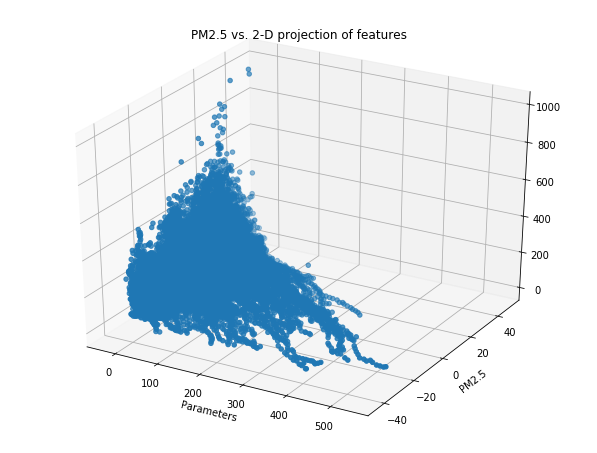

In [13]:
fig = plt.figure(1, figsize=(8,6))
ax=Axes3D(fig)
ax.scatter(X_2d[:,0],X_2d[:,1],df['pm2.5'])

ax.set_xlabel('Parameters')
ax.set_ylabel('PM2.5')

ax.set(title = 'PM2.5 vs. 2-D projection of features')
plt.show()

[Text(0,0.5,'pm2.5'), Text(0.5,0,'Other params')]

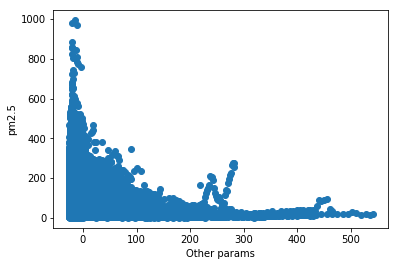

In [14]:
pca1 = PCA(n_components=1)
X = df.loc[:,'DEWP':'Ir']
X_1d = pca1.fit_transform(X)

fig,ax = plt.subplots()
ax.scatter(X_1d,df['pm2.5'])
ax.set(xlabel='Other params',ylabel='pm2.5')

## 3. Shuffle data and split into training and test sets 

(Estimated time: 20 min)

In [15]:
x_shuffle = df.loc[:,'DEWP':'Ir']
y_shuffle = df['pm2.5']

train_x,test_x,train_y,test_y = train_test_split(x_shuffle,y_shuffle,test_size=0.5,random_state=20)

print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(20878, 6) (20879, 6) (20878,) (20879,)


## 4. Scale the training and test sets 

(Estimated time: 20 min)

In [16]:
x_scalar = StandardScaler()

y_scalar = StandardScaler()

x_scalar.fit(train_x)

train_x_scaled = x_scalar.transform(train_x)
test_x_scaled = x_scalar.transform(test_x)



y_scalar.fit(train_y.values.reshape(-1, 1))

# 2. scale both y series
train_y_scaled = y_scalar.transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scalar.transform(test_y.values.reshape(-1, 1))

## 5. Train linear regression and evaluate metrics 

- Use LinearRegression to fit a linear model on the training data.
- Evaluate the metrics for this model using r2_score and mean_square_error

(Estimated time: 20 min)

In [17]:
lin = LinearRegression()
lin.fit(train_x_scaled,train_y_scaled)
pred_scaled = lin.predict(test_x_scaled)

print('MSE:', mean_squared_error(test_y_scaled, pred_scaled)) # lower is better
print('R2:', r2_score(test_y_scaled, pred_scaled))

MSE: 0.7488194817495791
R2: 0.23629879918923358


In [18]:
from sklearn.model_selection import learning_curve

lin2 = LinearRegression()
#learning_curve?
train_sizes, train_score,val_score = learning_curve(lin2,train_X_scaled,train_y_scaled)


train_mean=np.mean(train_score,axis=1)
val_mean= np.mean(val_score,axis=1)

for train_size,t,m in zip(train_sizes,train_mean,val_mean):
    print(train_size,t,m)
    
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(train_sizes,train_mean,label='train score',marker='x')
ax.plot(train_sizes,val_mean,label='val score',marker='o')
ax.grid()
ax.legend()
ax.set(xlabel='train size',ylabel='r2 score',title='Learning curve for Linear Regression')
plt.show()


NameError: name 'train_X_scaled' is not defined

## 6. Train linear regression with Stochastic Gradient Descent and evaluate metrics 

Use SGDRegressor to train a linear model using SGD
- Evaluate the metrics for this model using r2_score and mean_square_error
- Play around with the parameters to see how the loss is affected

(Estimated time: 30 min)

In [ ]:
sgd = SGDRegressor(verbose=True, tol=1e-2,max_iter=2000)

sgd.fit(train_x_scaled,train_y_scaled.ravel())
pred_scaled_sgd = sgd.predict(test_x_scaled)
print('MSE:', mean_squared_error(test_y_scaled, pred_scaled_sgd))
print('R2:', r2_score(test_y_scaled, pred_scaled_sgd))



In [ ]:
from sklearn.model_selection import learning_curve

lin2 = LinearRegression()
#learning_curve?
train_sizes, train_score,val_score = learning_curve(lin2,train_X_scaled,train_y_scaled)


train_mean=np.mean(train_score,axis=1)
val_mean= np.mean(val_score,axis=1)

for train_size,t,m in zip(train_sizes,train_mean,val_mean):
    print(train_size,t,m)
    
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(train_sizes,train_mean,label='train score',marker='x')
ax.plot(train_sizes,val_mean,label='val score',marker='o')
ax.grid()
ax.legend()
ax.set(xlabel='train size',ylabel='r2 score',title='Learning curve for Linear Regression')
plt.show()


## 7. Get a prediction

Get a few samples from the test dataset (test_X, test_y) and use them to get predictions from both models.

The goal is to simulate how the models will be called from python when they are deployed with real data.

(Estimated time: 30 min)

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df = pd.read_csv('C:/Users/thang/Documents/Thangamani/NUS/courseware/mldds-courseware/02_BasicMLAlgorithms/PRSA_data_2010.1.1-2014.12.31.csv')
cbwd_encoded = le.fit_transform(df.cbwd)
df_tmp = pd.DataFrame(cbwd_encoded,index=df.cbwd.index)
df_test=pd.concat([df.cbwd,df_tmp],axis=1)
#print(df.cbwd)

#print(cbwd_encoded)

df_test.head()

,cbwd,0
0,NW,1
1,NW,1
2,NW,1
3,NW,1
4,NW,1


In [ ]:
cbwd_one_hot = pd.get_dummies(df.cbwd)

df=pd.read_csv('C:/Users/thang/Documents/Thangamani/NUS/courseware/mldds-courseware/02_BasicMLAlgorithms/PRSA_data_2010.1.1-2014.12.31.csv')

df.dropna(inplace=True)
df2 = pd.concat([df,cbwd_one_hot],axis=1)

X = df2.loc[:, ['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'NE', 'NW', 'SE', 'cv']]
y = df2['pm2.5']

X.columns

train_X, test_X, train_y, test_y = train_test_split(X, y)

X_scaler = StandardScaler()
y_scaler = StandardScaler()

train_X_scaled = X_scaler.fit_transform(train_X)
test_X_scaled = X_scaler.transform(test_X)

train_y_scaled = y_scaler.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scaler.transform(test_y. values.reshape(-1, 1))

lin = LinearRegression()
lin.fit(train_X_scaled, train_y_scaled)

lin_pred_scaled = lin.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, lin_pred_scaled))
print('R2:', r2_score(test_y_scaled, lin_pred_scaled))

sgd = SGDRegressor(verbose=True, tol=1e-9, max_iter=1000)
sgd.fit(train_X_scaled, train_y_scaled.ravel())

sgd_pred_scaled = sgd.predict(test_X_scaled)

print('SGD MSE:', mean_squared_error(test_y_scaled, sgd_pred_scaled))
print('SGD R2:', r2_score(test_y_scaled, sgd_pred_scaled))


In [ ]:
df=pd.read_csv('C:/Users/thang/Documents/Thangamani/NUS/courseware/mldds-courseware/02_BasicMLAlgorithms/PRSA_data_2010.1.1-2014.12.31.csv')
df.dropna(inplace=True)

le = LabelEncoder()
cbwd_encoded = le.fit_transform(df.cbwd)

df.dtypes

X = df2.loc[:, ['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES',
       'Iws', 'Is', 'Ir', 'NE', 'NW', 'SE', 'cv']]
y = df2['pm2.5']

train_X, test_X, train_y, test_y = train_test_split(X, y)

X_scaler = StandardScaler()
y_scaler = StandardScaler()

train_X_scaled = X_scaler.fit_transform(train_X)
test_X_scaled = X_scaler.transform(test_X)

train_y_scaled = y_scaler.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scaler.transform(test_y. values.reshape(-1, 1))

lin = LinearRegression()
lin.fit(train_X_scaled, train_y_scaled)

lin_pred_scaled = lin.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, lin_pred_scaled))
print('R2:', r2_score(test_y_scaled, lin_pred_scaled))

sgd = SGDRegressor(verbose=True, tol=1e-9, max_iter=1000)
sgd.fit(train_X_scaled, train_y_scaled.ravel())

sgd_pred_scaled = sgd.predict(test_X_scaled)

print('SGD MSE:', mean_squared_error(test_y_scaled, sgd_pred_scaled))
print('SGD R2:', r2_score(test_y_scaled, sgd_pred_scaled))






In [ ]:
#Decision Trees

# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(train_X_scaled, train_y_scaled)

tree_pred_scaled = tree.predict(test_X_scaled)

print('MSE (Decision Tree):', mean_squared_error(test_y_scaled, tree_pred_scaled))
print('R2 (Decision Tree):', r2_score(test_y_scaled, tree_pred_scaled))

2087 0.28770537171423005 0.263783549558611
6785 0.27845083191165715 0.27324612692739997
11482 0.2778467047351077 0.2739915141809831
16180 0.2754217480537171 0.2743283145364099
20878 0.275869363056693 0.27470301110877826


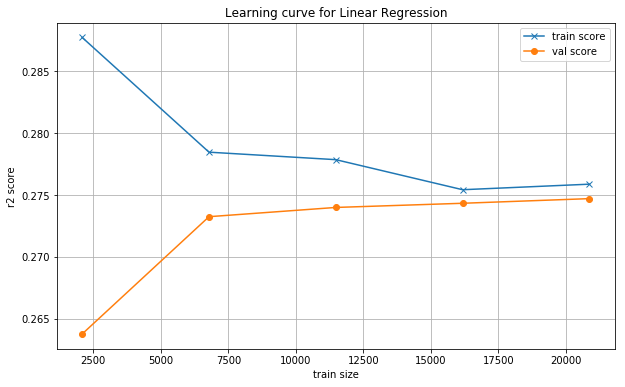

In [91]:
from sklearn.model_selection import learning_curve

lin2 = LinearRegression()
#learning_curve?
train_sizes, train_score,val_score = learning_curve(lin2,train_X_scaled,train_y_scaled)


train_mean=np.mean(train_score,axis=1)
val_mean= np.mean(val_score,axis=1)

for train_size,t,m in zip(train_sizes,train_mean,val_mean):
    print(train_size,t,m)
    
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(train_sizes,train_mean,label='train score',marker='x')
ax.plot(train_sizes,val_mean,label='val score',marker='o')
ax.grid()

ax.legend()
ax.set(xlabel='train size',ylabel='r2 score',title='Learning curve for Linear Regression')
plt.show()
